In [3]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
#
move_to_rootf(print_tf=True)

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [4]:
cwidth = 4
cheight = cwidth / 1.618 #Divine proportion!

label_size = 0
tick_size = 0
text_size = 0

def set_text_size(c):
    label_size = 10 * c / 2.2#2.73 #Multiply by 4/2.73 since figures are going to have 2.73 inches in final pdf 
    #label_size = 12 * c / 2.73 #Multiply by 4/2.73 since figures are going to have 2.73 inches in final pdf 
    tick_size = 8 * c / 2.2#2.73
    text_size = 12 * c / 2.2#2.73
    tick_size = 12 * c / 2.2#2.73
    
    params = {"axes.labelsize": label_size, "font.family":"sans-serif", "font.serif":"Helvetica",
         "xtick.labelsize": tick_size, "ytick.labelsize":tick_size}
    # sns.set_context("paper", rc=params)
    return label_size, tick_size, text_size

label_size, tick_size, text_size = set_text_size(cwidth)

#path = "../articulo/v3/graphs/"
#datapath = "larr_data/larremore_data/"

#plt.rc('text', usetex=True)
#plt.rc('xtick', labelsize=8)
#plt.rc('ytick', labelsize=8)
#plt.rc('axes', labelsize=8)

# print(sns.axes_style())
# print(sns.plotting_context())

def set_ticks(axis, x, ticks, fmt=1):
    if (x=="x"):
        axis.set_xticks(ticks)
        axis.set_xticklabels(["{0:.{1}f}".format(t, fmt) for t in ticks])
    else:
        axis.set_yticks(ticks)
        axis.set_yticklabels(["{0:.{1}f}".format(t, fmt) for t in ticks])

/tmp/ipykernel_63038/471254219.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('magma_r', len(L))
/tmp/ipykernel_63038/471254219.py:67: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('magma_r', len(L))


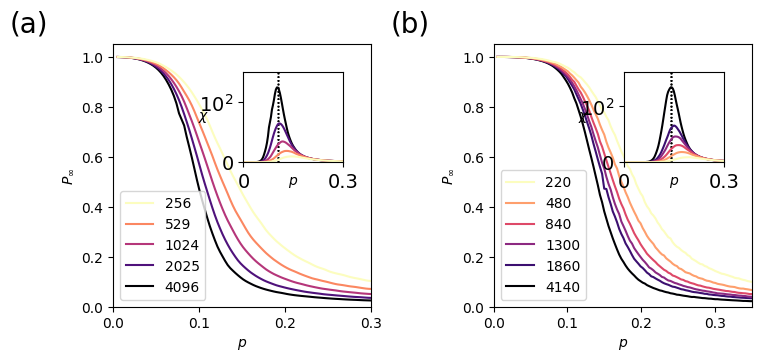

In [6]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import numpy as np
from matplotlib.pyplot import cm
from scipy.cluster import hierarchy
import matplotlib as mpl
import matplotlib.colors
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import fcluster
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot
import matplotlib.ticker
import networkx as nx
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
from scipy.ndimage import gaussian_filter


ax_dict = plt.figure(constrained_layout=True,figsize=(7.5,3.5)).subplot_mosaic(
    """
     AB
    """
)

L=[16,23,32,45,64]
#N_size=np.power(2,Ns)


axins = inset_axes(ax_dict['A'], width=1.0, height=0.9,loc=1, borderpad=2)
cont=0

cmap = plt.cm.get_cmap('magma_r', len(L))
pal = [cmap(i) for i in range(len(L))]

for N in L:
    Perc=pd.read_csv('data/plot/paper/panel_2/Squared/OrderP_L'+str(N),sep=',',header=None)
    c0=pal.pop(0)
    ax_dict['A'].plot(Perc[5],gaussian_filter(Perc[1],sigma=1),label=str(N*N),
                     zorder=-cont,color=c0)
    axins.axvline(x=0.103,color='black',ls=':',lw=1,zorder=-50)
    axins.plot(Perc[5],gaussian_filter(Perc[3]*N*N,sigma=1),zorder=-cont,color=c0)
    cont=cont+1
#gaussian_filter(Perc[1]/Perc[0],sigma=0.2) 
ax_dict['A'].legend(ncol=1,loc='lower left')
ax_dict['A'].set_xticks([0,0.1,0.2,0.3])
ax_dict['A'].set_xlim([0,0.3])
ax_dict['A'].set_ylim([0,1.05])
ax_dict['A'].set_xlabel(r'$p$')
ax_dict['A'].set_ylabel(r'$P_\infty$')
axins.set_xlabel(r'$p$',labelpad=-12)
axins.set_ylabel(r'$\chi$',rotation=0,va="center",labelpad=-3)
lx=[0,0.3]
ly=[0,100]
axins.set_xticks(lx,lx,fontsize=14)
#axins.set_xticklabels([0.5,1.5],, ha='right')
axins.set_yticks(ly,[0,r'$10^2$'],fontsize=14)
axins.set_xlim([0,0.3])
axins.set_ylim([0,150])signedgraph


L=[20,30,40,50,60,90]

axins = inset_axes(ax_dict['B'], width=1.0, height=0.9,loc=1, borderpad=2)
cont=0

cmap = plt.cm.get_cmap('magma_r', len(L))
pal = [cmap(i) for i in range(len(L))]
for N in L:
        Perc=pd.read_csv('data/plot/paper/panel_2/Triangular/OrderP_L'+str(N),sep=',',header=None)
        c0=pal.pop(0)
        ax_dict['B'].plot(Perc[5],((N*N)/(0.5*N*(N+2)))*gaussian_filter(Perc[1],sigma=0),label=str(int(0.5*N*(N+2))),
                     zorder=-cont,color=c0,lw=1.5)
        #ax_dict['B'].axvline(x=0.14,color='black',ls=':',lw=1,zorder=-100)
        axins.axvline(x=0.14,color='black',ls=':',lw=1,zorder=-50)
        axins.plot(Perc[5],(((N*N)/(0.5*N*(N+2)))**2)*gaussian_filter(Perc[3]*(0.5*N*(N+2)),sigma=1),lw=1.5,zorder=-cont,color=c0)
        cont=cont+1

   # ax_dict['B'].plot(N_size,(MeanSize/(N_size))/(MeanSize[0]/N_size[0]),ls=None,marker='o',label=k1,color=pal.pop(0))

ax_dict['B'].legend(ncol=1,loc='lower left')

ax_dict['B'].set_xlabel(r'$p$')
ax_dict['B'].set_ylabel(r'$P_\infty$')
ax_dict['B'].set_xlim([0,0.35])
ax_dict['B'].set_ylim([0,1.05])
ax_dict['B'].set_xticks([0,0.1,0.2,0.3])

axins.set_xlabel(r'$p$',labelpad=-12)
axins.set_ylabel(r'$\chi$',rotation=0,va="center",labelpad=-3)
lx=[0,0.3]
ly=[0,100]
axins.set_xticks(lx,lx,fontsize=14)
#axins.set_xticklabels([0.5,1.5],, ha='right')
axins.set_yticks(ly,[0,r'$10^2$'],fontsize=14)
axins.set_xlim([0,0.3])
axins.set_ylim([0,160])



ax_dict['A'].text(-0.4, 1.05, '(a)', transform=ax_dict['A'].transAxes, 
            size=20)
ax_dict['B'].text(-0.4, 1.05, '(b)', transform=ax_dict['B'].transAxes, 
            size=20)
plt.savefig('Phase_Tr.svg')
plt.show()

/tmp/ipykernel_63038/2349356178.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('plasma', len(L))
/tmp/ipykernel_63038/2349356178.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('plasma', len(L))


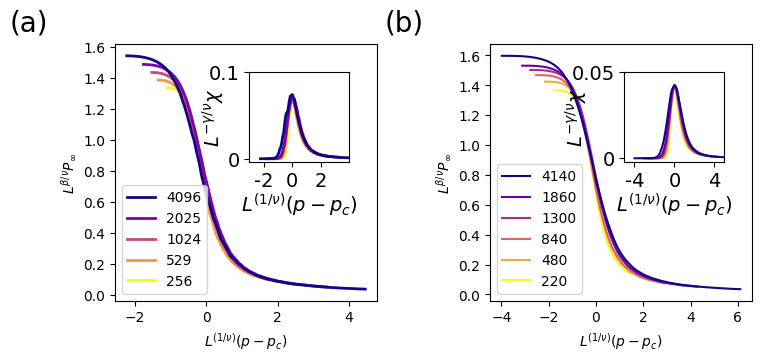

In [10]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import numpy as np
from matplotlib.pyplot import cm
from scipy.cluster import hierarchy
import matplotlib as mpl
import matplotlib.colors
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import fcluster
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot
import matplotlib.ticker
import networkx as nx
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
from scipy.ndimage import gaussian_filter


ax_dict = plt.figure(constrained_layout=True,figsize=(7.5,3.5)).subplot_mosaic(
    """
     AB
    """
)

L=[16,23,32,45,64]
L.reverse()
#N_size=np.power(2,Ns)


axins = inset_axes(ax_dict['A'], width=1.0, height=0.9,loc=1, borderpad=2)
cont=0

cmap = plt.cm.get_cmap('plasma', len(L))
pal = [cmap(i) for i in range(len(L))]
for N in L:
    Perc=pd.read_csv('data/plot/paper/panel_2/Squared/OrderP_L'+str(N),sep=',',header=None)
    c0=pal.pop(0)
    rc=Perc[5][np.where(Perc[3]==np.max(Perc[3]))[0][0]]
    ax_dict['A'].plot(((N)**(3/4))*(Perc[5]-rc),((N)**(15/144))*gaussian_filter(Perc[1],sigma=0),label=str(N*N),
                     zorder=-cont,color=c0,lw=2)
    #axins.axvline(x=0.103,color='black',ls=':',lw=1,zorder=-50)
    axins.plot((N**(3/4))*(Perc[5]-rc),(N**(-129/72))*gaussian_filter(Perc[3]*N*N,sigma=0),lw=2,zorder=-cont,color=c0)
    cont=cont+1
#gaussian_filter(Perc[1]/Perc[0],sigma=0.2) 
ax_dict['A'].legend(ncol=1,loc='lower left')
#ax_dict['A'].set_xticks([0,0.1,0.2,0.3])
#ax_dict['A'].set_xlim([0,0.3])
#ax_dict['A'].set_ylim([0,1.05])
ax_dict['A'].set_xlabel(r'$L^{(1/\nu)}(p-p_c)$')
ax_dict['A'].set_ylabel(r'$L^{\beta/\nu}P_\infty$')
axins.set_xlabel(r'$L^{(1/\nu)}(p-p_c)$',labelpad=0,fontsize=14)
axins.set_ylabel(r'$L^{-\gamma/\nu}\chi$',rotation=90,va="center",labelpad=-3,fontsize=14)
lx=[-2,0,2]
ly=[0,0.1]
axins.set_xticks(lx,lx,fontsize=14)
#axins.set_xticklabels([0.5,1.5],, ha='right')
axins.set_yticks(ly,ly,fontsize=14)
axins.set_xlim([-3,4])
#axins.set_ylim([0,150])


L=[20,30,40,50,60,90]
L.reverse()
axins = inset_axes(ax_dict['B'], width=1.0, height=0.9,loc=1, borderpad=2)
cont=0

cmap = plt.cm.get_cmap('plasma', len(L))
pal = [cmap(i) for i in range(len(L))]
for N in L:
        Perc=pd.read_csv('data/plot/paper/panel_2/Triangular/OrderP_L'+str(N),sep=',',header=None)
        c0=pal.pop(0)
        rc=Perc[5][np.where(Perc[3]==np.max(Perc[3]))[0][0]]
        L1=np.sqrt(0.5*N*(N+2))
        ax_dict['B'].plot((N**(3/4))*(Perc[5]-rc),((N)**(15/144))*((N*N)/(0.5*N*(N+2)))*gaussian_filter(Perc[1],sigma=1),label=str(int(0.5*N*(N+2))),
                     zorder=-cont,color=c0,lw=1.5)
        #ax_dict['B'].axvline(x=0.14,color='black',ls=':',lw=1,zorder=-100)
        #axins.axvline(x=0.14,color='black',ls=':',lw=1,zorder=-50)
        axins.plot((N**(3/4))*(Perc[5]-rc),(N**(-129/72))*(((N*N)/(0.5*N*(N+2)))**2)*gaussian_filter(Perc[3]*(0.5*N*(N+2)),sigma=1),lw=1.5,zorder=-cont,color=c0)
        cont=cont+1

   # ax_dict['B'].plot(N_size,(MeanSize/(N_size))/(MeanSize[0]/N_size[0]),ls=None,marker='o',label=k1,color=pal.pop(0))

ax_dict['B'].legend(ncol=1,loc='lower left')

ax_dict['B'].set_xlabel(r'$L^{(1/\nu)}(p-p_c)$')
ax_dict['B'].set_ylabel(r'$L^{\beta/\nu}P_\infty$')
#ax_dict['B'].set_xlim([0,0.35])
#ax_dict['B'].set_ylim([0,1.05])
#ax_dict['B'].set_xticks([0,0.1,0.2,0.3])

axins.set_xlabel(r'$L^{(1/\nu)}(p-p_c)$',labelpad=0,fontsize=14)
axins.set_ylabel(r'$L^{-\gasignedgraphmma/\nu}\chi$',rotation=90,va="center",labelpad=-3,fontsize=14)
lx=[-4,0,4]
ly=[0,0.05]
axins.set_xticks(lx,lx,fontsize=14)
#axins.set_xticklabels([0.5,1.5],, ha='right')
axins.set_yticks(ly,ly,fontsize=14)
axins.set_xlim([-5,5])
#axins.set_ylim([0,160])



ax_dict['A'].text(-0.4, 1.05, '(a)', transform=ax_dict['A'].transAxes, 
            size=20)
ax_dict['B'].text(-0.4, 1.05, '(b)', transform=ax_dict['B'].transAxes, 
            size=20)
#plt.savefig('Phase_Tr.svg')
plt.show()